# Case Study

Adapun hal2 yang akan dipelajari dalam pertemuan ini adalah sebagai berikut:

1. Import Data
2. Ubah Nama Kolom
3. Tabulasi Silang
4. Pivot Tabel
5. Visualisasi Data
6. Dashboard

## Risk Map

### Import Data

**Langkah 1:** Periksa direktori kerja Anda saat ini

In [1]:
import os                                   # Import library OS 
os.getcwd()                                 # Get the current working directory

'C:\\Users\\user\\Desktop\\Py_JNE'

**Langkah 2:** Salin direktori (jalur) file diatas untuk digunakan atau di-ubah sesuai direktori kerjanya yang diinginkan. Berikut diperlihatkan contohnya:

In [2]:
# Cara 1:Change the current working directory
os.chdir('C:\\Users\\user\\Desktop\\Py_JNE\\data\\CS')  

# Cara 2:Change the current working directory
os.chdir('C:/Users/user/Desktop/Py_JNE/data/CS')  

**Langkah 3:** Read (baca) data dari Excel ke Python (JupyterLab)

In [17]:
# library pandas untuk impor data
import pandas as pd                                   
Inherent = pd.read_excel('RiskRegister.xlsx',sheet_name="Risk Register", header=1, usecols='Q:U') 
Residual = pd.read_excel('RiskRegister.xlsx',sheet_name="Risk Register", header=1, usecols='V:Z')

**Langkah 4:** Periksa informasi dasar dan struktur data

In [4]:
Inherent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Impact            566 non-null    object
 1   Impact Value      566 non-null    int64 
 2   Likelihood        566 non-null    object
 3   Likelihood Value  566 non-null    int64 
 4   Risk Level        566 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 22.2+ KB


In [5]:
Residual.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Impact .1           566 non-null    object
 1   Impact Value.1      566 non-null    int64 
 2   Likelihood.1        566 non-null    object
 3   Likelihood Value.1  566 non-null    int64 
 4   Risk Level.1        566 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 22.2+ KB


**Catatan:** Karena nama varibel pada data Inherent dan Residual adalah sama, maka Python secara automatis melakukan penambahan indeks menggunakan nomor. Dalam hal ini ada baiknya jika nama varibel tersebut dibedakan pada saat pengumpulan data (atau bisa juga **rename**).

Berikut ini diperlihatkan **contoh error** akibat pemberian pada nama kolom dataset ada yang sama.

In [ ]:
Inherent['Impact']    # error karena tidak ada spasi di akhir nama variabel

### Ubah Nama Kolom

Untuk menghindari kesalahan atau error tersebut diatas maka perlu dilakukan ubah nama kolom pada data **Inherent** dan **Residual**.

In [18]:
Inherent.columns = ['Inh-Impact', 'Inh-Impact Value', 'Inh-Likelihood',
                    'Inh-Likelihood Value','Inh-Risk Level']
Inherent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Inh-Impact            566 non-null    object
 1   Inh-Impact Value      566 non-null    int64 
 2   Inh-Likelihood        566 non-null    object
 3   Inh-Likelihood Value  566 non-null    int64 
 4   Inh-Risk Level        566 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 22.2+ KB


In [19]:
Residual.columns = ['Res-Impact', 'Res-Impact Value', 'Res-Likelihood',
                    'Res-Likelihood Value','Res-Risk Level']
Residual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Res-Impact            566 non-null    object
 1   Res-Impact Value      566 non-null    int64 
 2   Res-Likelihood        566 non-null    object
 3   Res-Likelihood Value  566 non-null    int64 
 4   Res-Risk Level        566 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 22.2+ KB


### Tabulasi Silang

Metode ini digunakan untuk menghitung *cross-tabulation* (tabulasi silang) dari dua atau lebih variabel kategori. Dalam hal ini, digunakan untuk menghitung frekuensi dari 

In [22]:
Tab_Inh=pd.crosstab(Inherent["Inh-Likelihood Value"],Inherent["Inh-Impact Value"])
Tab_Inh

Inh-Impact Value,1,2,3,4,5
Inh-Likelihood Value,,,,,
1,8,3,3,3,11
2,1,10,5,21,3
3,0,3,61,46,30
4,0,0,22,219,37
5,1,1,2,37,39


In [23]:
Tab_Res=pd.crosstab(Residual["Res-Likelihood Value"],Residual["Res-Impact Value"])
Tab_Res

Res-Impact Value,1,2,3,4,5
Res-Likelihood Value,,,,,
1,74,14,16,34,41
2,4,51,68,74,5
3,5,9,79,35,15
4,0,2,8,28,1
5,0,0,1,1,1


### Membalik Urutan Baris/Kolom

Dalam contoh ini, diperlihatkan cara menyusun ulang baris **(Reverse)** DataFrame dengan Python.

In [32]:
Rev_Tab_Inh = Tab_Inh[::-1]                    # Urutan baris terbalik
Rev_Tab_Inh                                    # Cetak data yang diperbarui


Inh-Impact Value,1,2,3,4,5
Inh-Likelihood Value,,,,,
5,1,1,2,37,39
4,0,0,22,219,37
3,0,3,61,46,30
2,1,10,5,21,3
1,8,3,3,3,11


In [34]:
Rev_Tab_Res = Tab_Res[::-1]                    # Urutan baris terbalik
Rev_Tab_Res                                    # Cetak data yang diperbarui

Res-Impact Value,1,2,3,4,5
Res-Likelihood Value,,,,,
5,0,0,1,1,1
4,0,2,8,28,1
3,5,9,79,35,15
2,4,51,68,74,5
1,74,14,16,34,41


**Catatan:** Seandainya anda ingin membalik urutan berdasarkan kolom perhatikan contoh berikut:

**Keterangan:** Link Penjelasan di [Youtube](https://www.youtube.com/watch?v=3cJmkdjepMw)

* **Impact** dibagi menjadi 5 kategori penilaian berikut:
    * **(1) Insignificant ,** yang artinya tidak signifikan (tidak berdampak)
    * **(2) Minor,** berdampak ringan
    * **(3) Moderate,** Sedang 
    * **(4) Major,** cukup parah
    * **(5) Catastrophic,**  sangat parah
    
* **Likelihood** dibagi menjadi 5 kategori penilaian berikut:
    * **(1) Rare,** Cenderung tidak mungkin terjadi 
    * **(2) Unlikely,**  Kemungkinan kecil terjadi
    * **(3) Possible,**  Sama kemungkinan antara terjadi dan tidak terjadi
    * **(4) Likely,**  Kemungkinan besar terjadi 
    * **(5) Certain,**  Sangat mungkin pasti terjadi 

### Heat Maps

Berdasarkan keterangan diatas, berikut ini ditampilkan matriks resikonya secara visual:

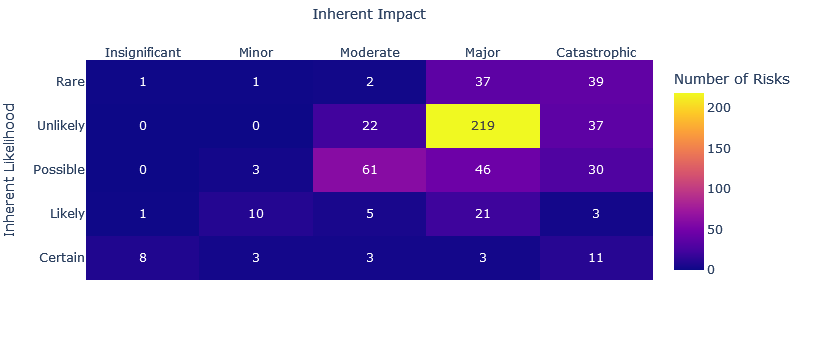

In [86]:
import plotly.express as px

fig1 = px.imshow(Rev_Tab_Inh,
                 x=['Insignificant', 'Minor', 'Moderate','Major','Catastrophic'],
                 y=['Rare', 'Unlikely', 'Possible', 'Likely', 'Certain'],
                 labels=dict(x="Inherent Impact", 
                            y="Inherent Likelihood", 
                            color="Number of Risks"),
                 text_auto=True,
                 aspect="auto"
                )
fig1.update_xaxes(side="top")
fig1.show()

Representasi kategori resiko yang dihasilkan dari penilaian matriks resiko, adalah sebagai berikut:

<center>
<img src="https://github.com/sainzdata/Py_JNE/blob/main/images/risk_matrix.png?raw=true" width=470" height="350">
</center>


* **Acceptable :** Tidak ada tindakan yang diperlukan
* **Supplementary Issue :** tindakan dianjurkan jika sumber daya yang tersedia
* **Issue :** Tindakan yang diperlukan untuk mengelola risiko tambahan (dampak lainnnya)
* **Unacceptable :** Tindakan segera dilakukan untuk mengelola risiko

https://synergysolusi.com/indonesia/berita-terbaru/pentingnya-manajemen-risiko-k3-dalam-pekerjaan